In [1]:
# Try to figure out wind reconstruction

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import downscaling_notCubed as ds

In [3]:
can07_u, can07_v = ds.import_CANRCM_winds(2007)

In [4]:
can07_u.lon.values[13, 16]

235.94528198242188

14.872763


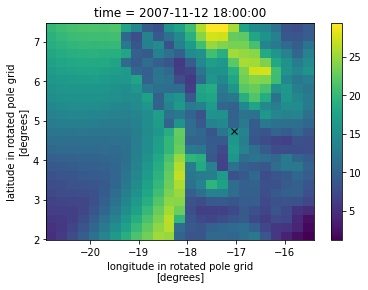

In [5]:
nit = 2509
can07_v[nit].plot();
iv = 12
iu = 17
plt.plot(can07_u.rlon.values[iu], can07_u.rlat.values[iv], 'kx');
print (can07_v[nit, iv, iu].values)

In [7]:
hr07_u, hr07_v = ds.import_HRDPS_winds(2007)

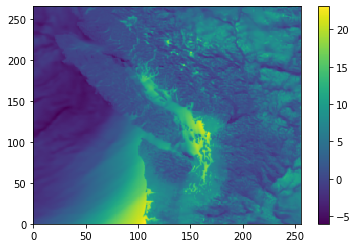

In [8]:
plt.pcolormesh(hr07_v[nit]);
plt.colorbar();

Looking identical!  All good.

In [9]:
can07_mat = ds.transform2(can07_u, can07_v)
can07_PCs, can07_eigs, can07_mean = ds.doPCA(100, can07_mat)
del can07_mat

In [10]:
hr07_mat = ds.transform2(hr07_u, hr07_v)
del hr07_u
del hr07_v
hr07_PCs, hr07_eigs, hr07_mean = ds.doPCA(100, hr07_mat)
del hr07_mat

In [11]:
can07_me = np.concatenate((can07_mean.reshape(1, -1), can07_eigs))
hr07_me = np.concatenate((hr07_mean.reshape(1, -1), hr07_eigs))
del can07_eigs
del hr07_eigs

Reconstruct Can RCM results

In [12]:
myr = 65
reconC = np.matmul(can07_PCs[:,0:myr], can07_me[1:myr+1, nit-5:nit+3]) + can07_me[0, nit-5:nit+3]

12.52315


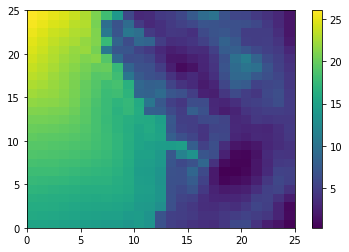

In [13]:
myrecon = ds.reverse(reconC, (-1, 25, 25))
plt.pcolormesh(myrecon[14])
plt.colorbar();
print (myrecon[8+5, iv, iu])

SOOOOO much better.

In [19]:
print (can07_v[nit, iv, iu].values, myrecon[1::2, iv, iu])

14.872763 [ 6.3641214  8.517401   9.777827   9.073637  11.39413   13.975222
 12.52315    9.449694 ]


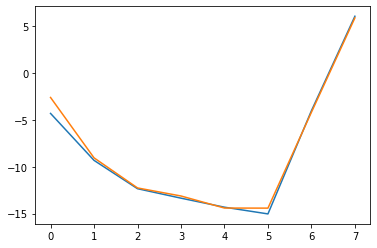

In [20]:
plt.plot(myrecon[0::2, iv, iu]);
plt.plot(can07_u[nit-5:nit+3, iv, iu]);

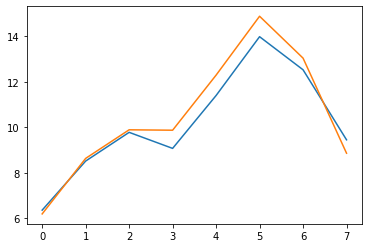

In [21]:
plt.plot(myrecon[1::2, iv, iu]);
plt.plot(can07_v[nit-5:nit+3, iv, iu]);

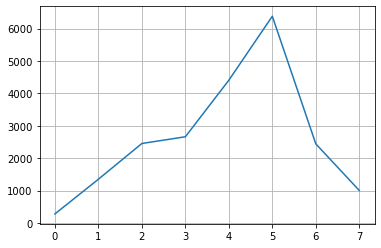

In [243]:
plt.plot(can07_v[nit-5:nit+3, iv, iu])
plt.grid()
nit = 2509